In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/pinocchio_analysis_unbinned_SSC/')
import analysis
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import plot_function as plotssc
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]
import matplotlib as mpl

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC_mcmc/'

In [4]:
file = [
    d+f'tabulate_full_unbinned_sample_planck.pkl',
        d+f'tabulate_full_unbinned_sample_spt.pkl',
     d+f'tabulate_full_unbinned_sample_pinocchio.pkl',
        d+f'tabulate_full_unbinned_sample_erosita.pkl',
        ]
filessc = [
    d+f'tabulate_hybrid_garrell_unbinned_SSC_sample_planck.pkl',
        d+f'tabulate_hybrid_garrell_unbinned_SSC_sample_spt.pkl',
    d+f'tabulate_hybrid_garrell_unbinned_SSC_sample_pinocchio.pkl',
        d+f'tabulate_hybrid_garrell_unbinned_SSC_sample_erosita.pkl',
        ]

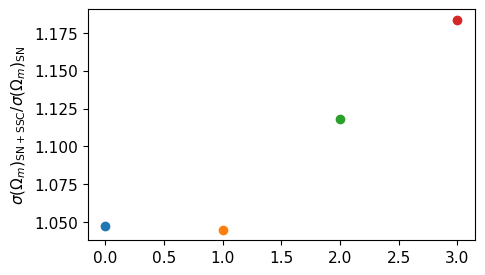

In [10]:
color = ['C0', 'C1', 'C2']
fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
for i in range(4):

    res_unbinned = plotssc.likelihood_load(file = file[i], only_one=True)
    mean_Om_SN = np.trapz(res_unbinned['P']*res_unbinned['Om'], res_unbinned['Om'])
    err_Om_SN = np.trapz((mean_Om_SN - res_unbinned['Om'])**2*res_unbinned['P'], res_unbinned['Om'])**.5
    #plt.errorbar(i-0.01,mean_Om_SN, err_Om_SN,  marker = '.', fmt=' ', zorder=100)
    
    res_unbinnedssc = plotssc.likelihood_load(file = filessc[i], only_one=True)
    mean_Om_SNssc = np.trapz(res_unbinnedssc['P']*res_unbinnedssc['Om'], res_unbinnedssc['Om'])
    err_Om_SNssc = np.trapz((mean_Om_SNssc - res_unbinnedssc['Om'])**2*res_unbinnedssc['P'], res_unbinnedssc['Om'])**.5
    #plt.errorbar(i+0.01,mean_Om_SN, err_Om_SN,  marker = '.', fmt=' ', zorder=100)
    
    plt.scatter(i, err_Om_SNssc/err_Om_SN)
plt.errorbar([], [], marker = 'o', markersize=10, capsize=5, color = 'k', markerfacecolor='w', label = 'hybrid likelihood (SN+SSC)')
plt.errorbar([], [], marker = 'x', markersize=10, capsize=5, color = 'k', markerfacecolor='w', label = 'standard unbinned likelihood (SN-only)')
plt.errorbar([], [], marker = '+', markersize=10, capsize=5, color = 'k', markerfacecolor='w', label = 'hybrid likelihood (SN-only)')
plt.ylabel(r'$\sigma(\Omega_m)_{\rm SN+SSC}/\sigma(\Omega_m)_{\rm SN}$', fontsize=11)
plt.tick_params(axis='both', which = 'major', labelsize= 11)
#plt.legend(fontsize=9, loc='upper right', frameon=True, framealpha=1)
#plt.savefig('cosmo.png', bbox_inches='tight', dpi=300)